## EDA ASSIGNMENT: Use only standard python functions to solve these. No External libary. Prefer using `File Handling for reading and writing files` while `map, filter, reduce, lambda functions` etc for calculations and wherever possible..

### Easy: 
Q1: Read the california housing test data present in sample_data directory using read mode

In [230]:
path = 'california_housing_test.csv'
res = []

with open(path) as f:
    a = f.readlines()
    
    for i in range(1,len(a)):
        line = a[i].split(',')
        res.append({'longitude':float(line[0]),
                    'latitude':float(line[1]),
                    'housing_median_age':round(float(line[2])),
                    'total_rooms':round(float(line[3])),
                    'total_bedrooms':round(float(line[4])),
                    'population':round(float(line[5])),
                    'households':round(float(line[6])),
                    'median_income':float(line[7]),
                    'median_house_value':round(float(line[8]))
                    })
        
res = sorted(res,key = lambda x:x['median_house_value'])
res[:3]

[{'longitude': -117.16,
  'latitude': 32.71,
  'housing_median_age': 52,
  'total_rooms': 845,
  'total_bedrooms': 451,
  'population': 1230,
  'households': 375,
  'median_income': 1.0918,
  'median_house_value': 22500},
 {'longitude': -123.08,
  'latitude': 40.4,
  'housing_median_age': 10,
  'total_rooms': 365,
  'total_bedrooms': 102,
  'population': 140,
  'households': 49,
  'median_income': 1.7969,
  'median_house_value': 37500},
 {'longitude': -119.97,
  'latitude': 36.44,
  'housing_median_age': 18,
  'total_rooms': 1128,
  'total_bedrooms': 237,
  'population': 772,
  'households': 220,
  'median_income': 2.1771,
  'median_house_value': 39200}]

Q2: Calculate the Average Median Income and Average Population of full data.

In [231]:
from functools import reduce

ami = 0
ap = 0

# for i in res:
#     ami += i['median_income']
#     ap += i['population']

ami = reduce((lambda x,y : x+y),(i['median_income'] for i in res))
ap = reduce((lambda x,y : x+y),(i['population'] for i in res))

print("The average median income is :",round(ami/3000,2))
print("The average population is :",round(ap/3000,2))

The average median income is : 3.81
The average population is : 1402.8


Q3: Calculate and return the Min and Max of Housing Age and Housing Value


In [232]:
min_ha = reduce((lambda x,y : x if x<y else y),(i['housing_median_age'] for i in res))
max_ha = reduce((lambda x,y : x if x>y else y),(i['housing_median_age'] for i in res))

min_hv = reduce((lambda x,y : x if x<y else y),(i['median_house_value'] for i in res))
max_hv = reduce((lambda x,y : x if x>y else y),(i['median_house_value'] for i in res))

print("Minimum, Maximum Housing Age is:",min_ha,"and",max_ha)
print("Minimum, Maximum Housing Value is:",min_hv,"and",max_hv)

Minimum, Maximum Housing Age is: 1 and 52
Minimum, Maximum Housing Value is: 22500 and 500001


### Medium: 

Q1: 
For Houses between longitude -119 to -121 and latitude 35 to 37, calculate sum of total Rooms and AVG number of Rooms in this area.

In [233]:
sumr = 0
c = 0

for i in res:
    if (-119 >= i['longitude'] >= -121) and (35 <= i['latitude'] <= 37):
        sumr += i['total_rooms']
        c += 1

print("Total rooms in given longitude and latitude are:",sumr)
print("Avg rooms are:",sumr/c)

Total rooms in given longitude and latitude are: 475536
Avg rooms are: 2476.75


Q2: 
Calculate AVG Number of Rooms for Houses Priced in top 5 Percentile of Median House Value and compare the number of Rooms against bottom 5 percentiles of Median house Value.

In [234]:
k = int(0.05*3000)
    
artop5 = reduce((lambda x,y:x+y),(i['total_rooms'] for i in res[:k]))
arbottom5 = reduce((lambda x,y:x+y),(i['total_rooms'] for i in res[-k:]))

print("The avg rooms for houses in top 5 percentile is:",round(artop5/k,2))
print("The avg rooms for houses in bottom 5 percentile is:",arbottom5/k)

The avg rooms for houses in top 5 percentile is: 1609.97
The avg rooms for houses in bottom 5 percentile is: 3160.18


### Complex:
#### Q: Statistics: 
Let's say you have a hypothesis that as Income of household Increases the value of house Also increases the people with higher income are more likely to buy costlier Houses.


Can You Calculate Correlation between Median Income and Median House Prices.

Refer the following to correlation formula to calculate correlation coefficient between two columns let's say X and Y.



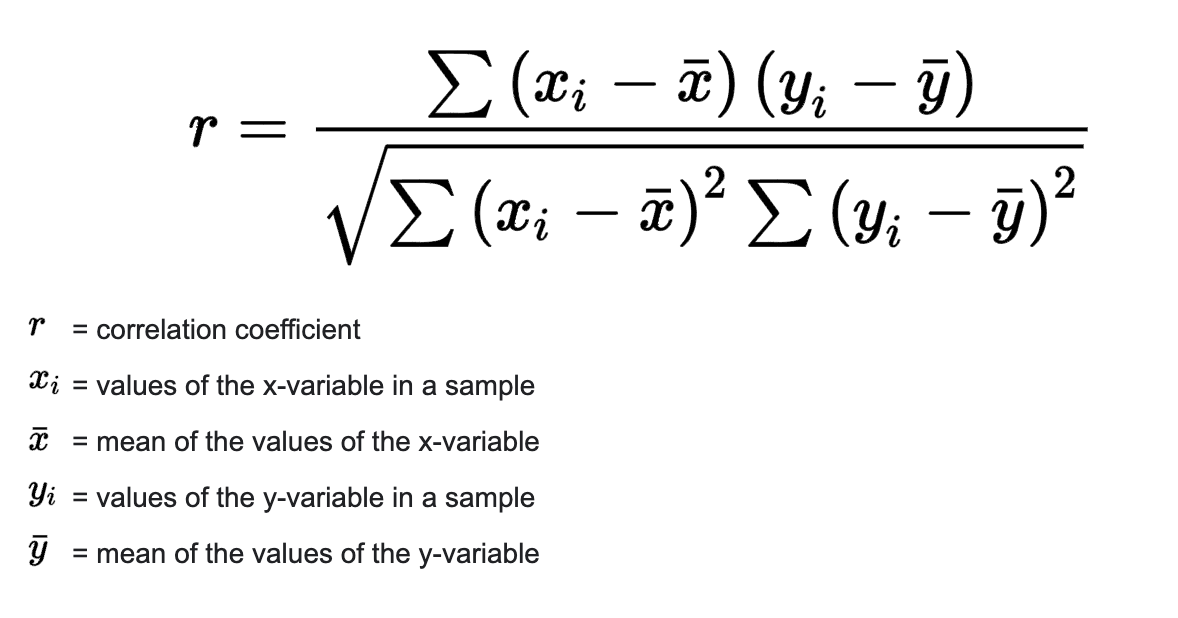

In [235]:
import math

ahp = (reduce((lambda x,y:x+y),(i['median_house_value'] for i in res)))/3000    #Average House Price


xy,xsq,ysq = 0,0,0

for i in res:
    x = i['median_income']-ami
    y = i['median_house_value']-ahp
    xy += (x*y)
    xsq += (x*x)
    ysq += (y*y)

r = xy/math.sqrt(xsq*ysq)
r

0.00010924086620422581

Note: Optional Reading sections are not required to be completed in order to solve any of the questions. They are just to make you familiar with the importance of the calculation you are making. So feel free to skips these concepts as they would be covered in future modules.

- Optional Reading: What is Correlation: https://en.wikipedia.org/wiki/Correlation

- Optional Reading: As you might already know correlation is not equal to causation(If not, read about it https://towardsdatascience.com/4-reasons-why-correlation-does-not-imply-causation-f202f69fe979), 

let's verify our hypethesis with actual data points.


#### Part1: Feature Engineering:

- Create A new Column Named Salary Category by assigning values such as 
`[Very Low Salary, Low-Salary, Medium Salary, High Salary, Very High Salary]`.


- The Cateogy should be assigned based 5 equal size buckets based on median income.

for Example Let's say min salary is 0 and max salary is 100 then each category will correspond to bucket size of 20 i,e 

```
mapping = {'0-20': Very Low Salary, '20-40': Low-Salary, '40-50': Medium Salary, '60-80' : High Salary, '80-100': Very High Salary]
```

Optional: Write this new Category back into your file as another column.

In [236]:
for i in res:
    j = i['median_income']
    if j<3.4:
        i['salary'] = 'Very Low Salary'
    elif 3.4 <= j < 6.3:
        i['salary'] = 'Low Salary'
    elif 6.3 <= j < 9.2:
        i['salary'] = 'Medium Salary'
    elif 9.2 <= j <12.1:
        i['salary'] = 'High Salary'
    else:
        i['salary'] = 'Very High Salary'

res[:3]

[{'longitude': -117.16,
  'latitude': 32.71,
  'housing_median_age': 52,
  'total_rooms': 845,
  'total_bedrooms': 451,
  'population': 1230,
  'households': 375,
  'median_income': 1.0918,
  'median_house_value': 22500,
  'salary': 'Very Low Salary'},
 {'longitude': -123.08,
  'latitude': 40.4,
  'housing_median_age': 10,
  'total_rooms': 365,
  'total_bedrooms': 102,
  'population': 140,
  'households': 49,
  'median_income': 1.7969,
  'median_house_value': 37500,
  'salary': 'Very Low Salary'},
 {'longitude': -119.97,
  'latitude': 36.44,
  'housing_median_age': 18,
  'total_rooms': 1128,
  'total_bedrooms': 237,
  'population': 772,
  'households': 220,
  'median_income': 2.1771,
  'median_house_value': 39200,
  'salary': 'Very Low Salary'}]

#### Part2: Analysis
- Calculate min, max and avg median_house_value for each of the above categories and analyse the trend if it's increasing or Decreasing as we move higher into Salary Bracket.


- Calculate % change in Avg Median_House_Value across category from previous to next

In [237]:
def mi_ma(x,z):
    mi = float('inf')
    ma = float('-inf')
    c = 0
    sum=0
    
    for i in x:
        if i['salary'] == z:
            c+=1
            sum+=i['median_house_value']
            if i['median_house_value'] > mi:
                ma = i['median_house_value']
            else:
                mi = i['median_house_value']
                
    return mi,round(sum/c,2),ma

print("Min, Avg, Max of House Value for Very Low Salary:",mi_ma(res,'Very Low Salary'),"\n")
print("Min, Avg, Max of House Value for Low Salary:",mi_ma(res,'Low Salary'),"\n")
print("Min, Avg, Max of House Value for Medium Salary:",mi_ma(res,'Medium Salary'),"\n")
print("Min, Avg, Max of House Value for High Salary:",mi_ma(res,'High Salary'),"\n")
print("Min, Avg, Max of House Value for Very High Salary:",mi_ma(res,'Very High Salary'),"\n")

print("As we can clearly see with increase in Salary Brackets, the average value of a house owned also increases ")

Min, Avg, Max of House Value for Very Low Salary: (22500, 146132.55, 500001) 

Min, Avg, Max of House Value for Low Salary: (40000, 236183.68, 500001) 

Min, Avg, Max of House Value for Medium Salary: (182400, 377084.3, 500001) 

Min, Avg, Max of House Value for High Salary: (225000, 481263.66, 500001) 

Min, Avg, Max of House Value for Very High Salary: (350000, 489286.64, 500001) 

As we can clearly see with increase in Salary Brackets, the average value of a house owned also increases 


In [238]:
# print("Min of Very Low S:",reduce((lambda x,y:x if x<y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Very Low Salary'])))
# print("Max of Very Low S:",reduce((lambda x,y:x if x>y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Very Low Salary'])),"\n")

# print("Min of Low S:",reduce((lambda x,y:x if x<y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Low Salary'])))
# print("Max of Low S:",reduce((lambda x,y:x if x>y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Low Salary'])),"\n")

# print("Min of Medium S:",reduce((lambda x,y:x if x<y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Medium Salary'])))
# print("Max of Medium S:",reduce((lambda x,y:x if x>y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Medium Salary'])),"\n")

# print("Min of High S:",reduce((lambda x,y:x if x<y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='High Salary'])))
# print("Max of High S:",reduce((lambda x,y:x if x>y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='High Salary'])),"\n")

# print("Min of Very High S:",reduce((lambda x,y:x if x<y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Very High Salary'])))
# print("Max of Very High S:",reduce((lambda x,y:x if x>y else y),(i['median_house_value'] for i in [i for i in res if i['salary']=='Very High Salary'])))

In [239]:
print("Average change of house value from very low to low salary is",round((236183.68/146132.55)*100,2),"%\n")
print("Average change of house value from low to medium salary is",round((377084.3/236183.68)*100,2),"%\n")
print("Average change of house value from medium to high salary is",round((481263.66/377084.3)*100,2),"%\n")
print("Average change of house value from high to vey high salary is",round((489286.64/481263.66)*100,2),"%\n")

Average change of house value from very low to low salary is 161.62 %

Average change of house value from low to medium salary is 159.66 %

Average change of house value from medium to high salary is 127.63 %

Average change of house value from high to vey high salary is 101.67 %



### You have to store the data into No-SQL databas and send it across web page as JSON Objects where each object stores information of corresponding to one row.

for example:
```
Row1=  [-122.05, 37.37, 27.0, 3885.0, 661.0, 1537.0, 606.0, 6.6085, 344700.0]
```
Expected Output = 
```
{
House1: 
{longitude: -122.05,
latitude: 37.37,
housing_median_age:27.0,
total_rooms: 3885.0,
total_bedrooms: 661.0,
population: 1537.0,
households: 606.0,
median_income: 6.6085,
median_house_value:344700.0
}
}
```

Write function to perform this transformation.

Use this function to transform all the rows and write them into a new file 'Transformed.json'

For Example: 

Input File: input.csv where each col is seperated by comma would look like:  

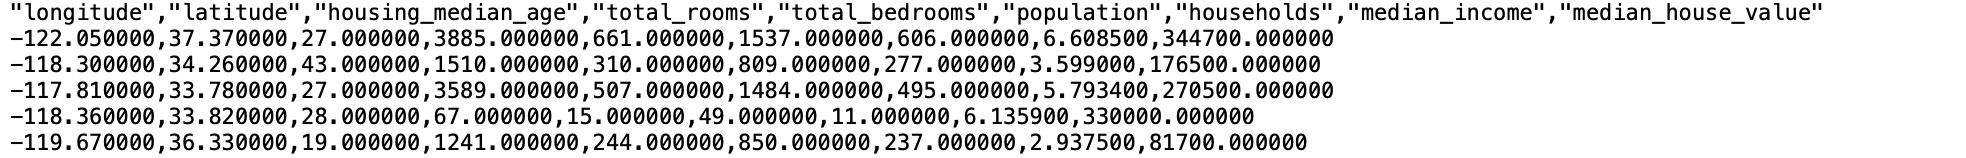

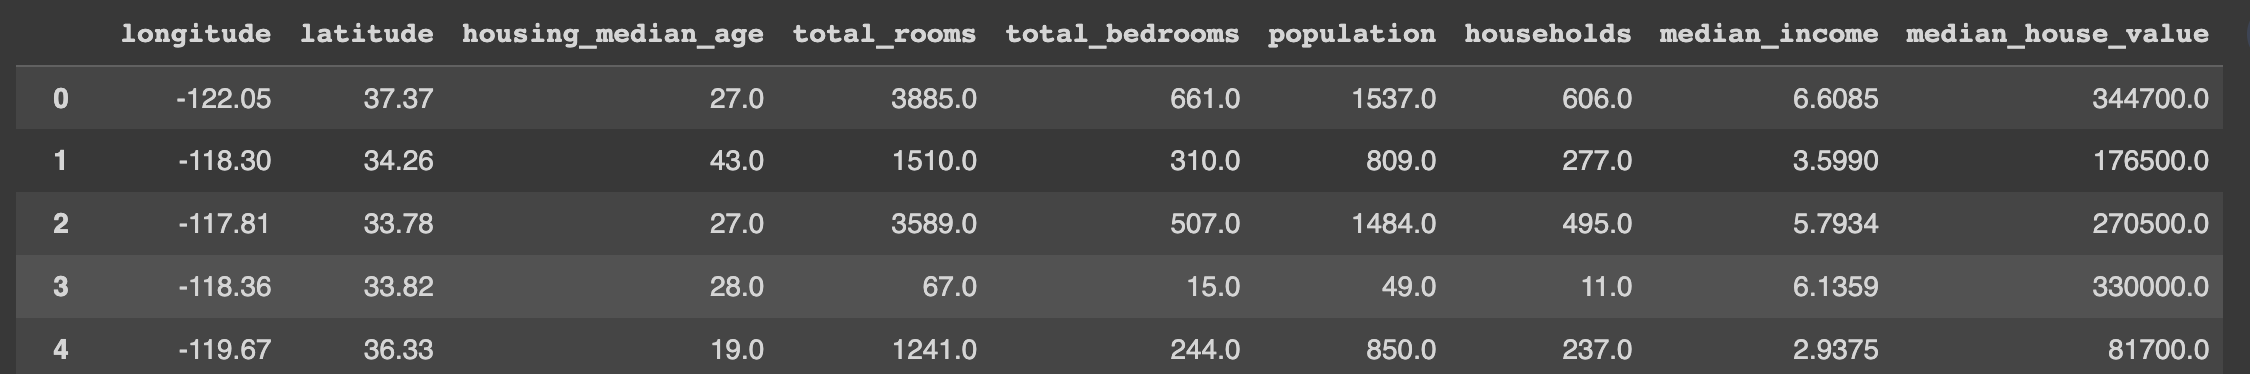

Expected Output: Transformed.json should contain: 
```
0: {'longitude': -122.05,
  'latitude': 37.37,
  'housing_median_age': 27.0,
  'total_rooms': 3885.0,
  'total_bedrooms': 661.0,
  'population': 1537.0,
  'households': 606.0,
  'median_income': 6.6085,
  'median_house_value': 344700.0},
 1: {'longitude': -118.3,
  'latitude': 34.26,
  'housing_median_age': 43.0,
  'total_rooms': 1510.0,
  'total_bedrooms': 310.0,
  'population': 809.0,
  'households': 277.0,
  'median_income': 3.599,
  'median_house_value': 176500.0},
 2: {'longitude': -117.81,
  'latitude': 33.78,
  'housing_median_age': 27.0,
  'total_rooms': 3589.0,
  'total_bedrooms': 507.0,
  'population': 1484.0,
  'households': 495.0,
  'median_income': 5.7934,
  'median_house_value': 270500.0},
 3: {'longitude': -118.36,
  'latitude': 33.82,
  'housing_median_age': 28.0,
  'total_rooms': 67.0,
  'total_bedrooms': 15.0,
  'population': 49.0,
  'households': 11.0,
  'median_income': 6.1359,
  'median_house_value': 330000.0},
 4: {'longitude': -119.67,
  'latitude': 36.33,
  'housing_median_age': 19.0,
  'total_rooms': 1241.0,
  'total_bedrooms': 244.0,
  'population': 850.0,
  'households': 237.0,
  'median_income': 2.9375,
  'median_house_value': 81700.0},
 5: {'longitude': -119.56,
  'latitude': 36.51,
  'housing_median_age': 37.0,
  'total_rooms': 1018.0,
  'total_bedrooms': 213.0,
  'population': 663.0,
  'households': 204.0,
  'median_income': 1.6635,
  'median_house_value': 67000.0},
  ```

In [240]:
with open("transformed.json","w") as t:
    for i in range(len(res)):
        t.write("House "+str(i+1)+" = "+str(res[i])+"\n\n")

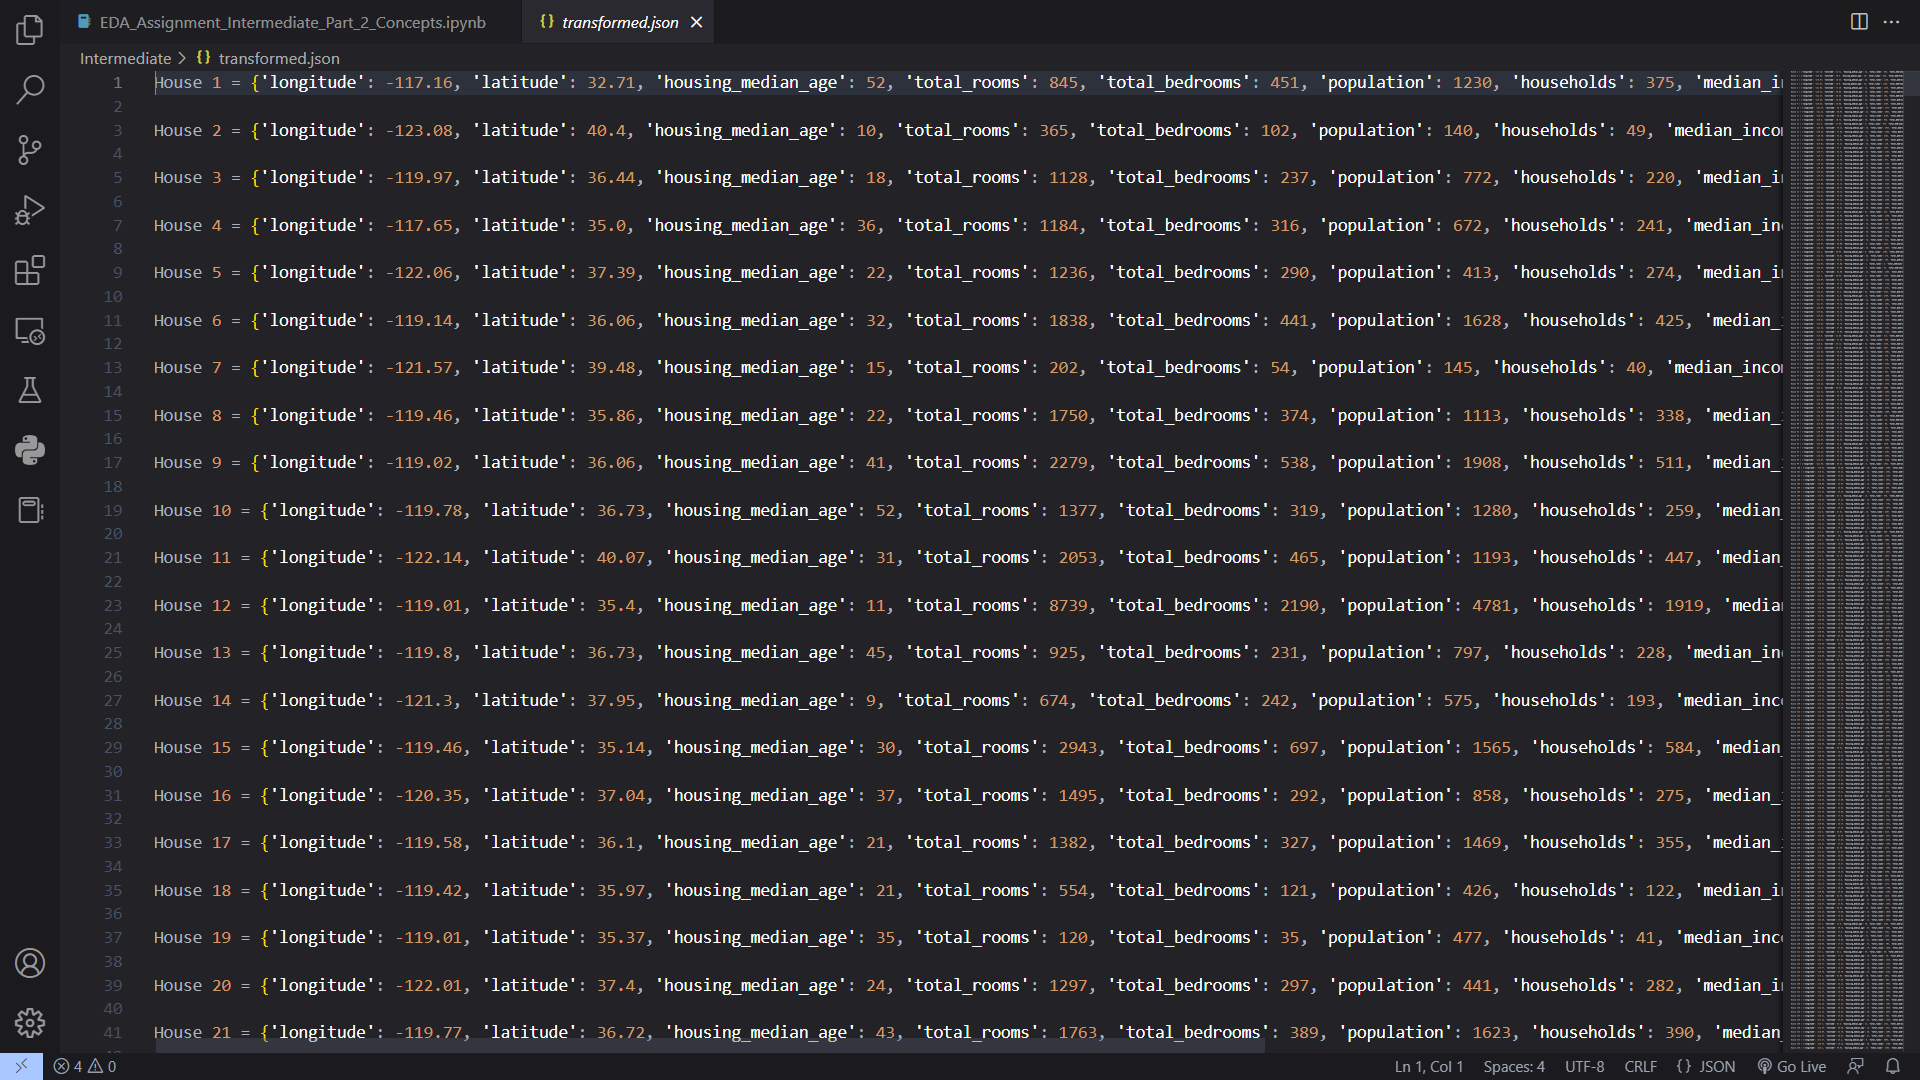

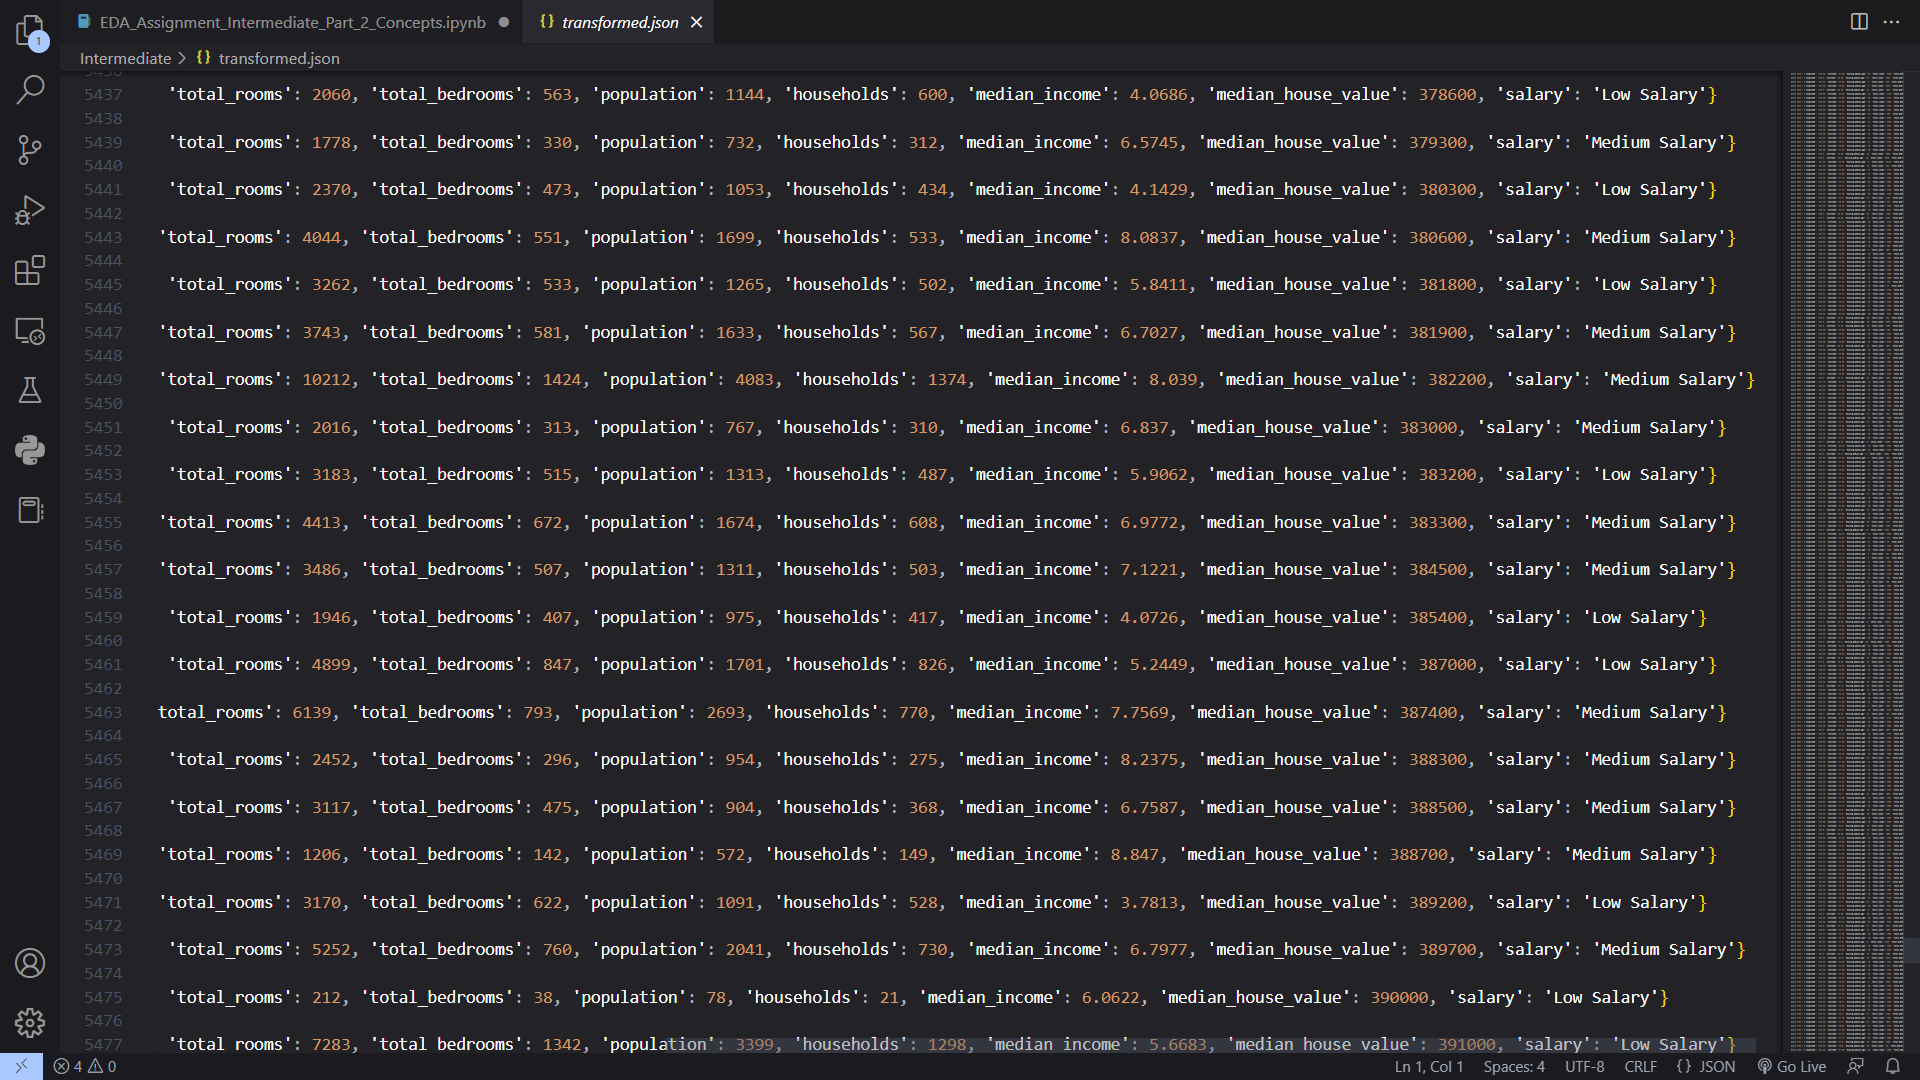